<a href="https://colab.research.google.com/github/ChaesongYun/Tensorflow/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EC%98%88%EC%B8%A1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 시계열 분석(Time Series)
- 시간: 특정 간격을 갖는 시간(Lag)
  - Lag에서 Data의 Trend를 찾는다
- 일변량 정상 시계열
  - ARIMA
<br>
<br>

### Trend, 추세
- 인구의 변화, 자원의 변화, 기술의 변화 등과 같은 요인들에 의해 영향을 받는 장기 변동 요인
- 급격한 충격이 없는 한 지속되는 특성
- 데이터 모양
- 시간이 지날 수록 점점 증가? 감소?
<br>
<br>

### Seasonality, 계절성
- 주기(12개월)에 따라서 트렌드가 달라지는 경우가 있음
- 계절의 변화, 공휴일의 반복, 추석 명절의 반복 등과 같은 요인들에 의하여 발생
<br>
<br>

### Cycle, 주기
- 경제활동의 팽창과 위축과 같이 불규칙적이며 반복적인 중기 변동 요인
- 관측기간이 길지 않을 경우 추세와 순환 요인을 구분하지 않고 그냥 묶어서 추세요인이라고 분석하기도
<br>
<br>

### Noise, 잡음
- 일정한 규칙성을 인지할 수 없는 변동의 유형을 의미
- 천재지변, 질병, 전쟁 등과 같이 예상할 수 없는 우연적 요인에 의해 발생되는 변동

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (15.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and direc

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
file_path = '/content/drive/MyDrive/Tensorflow/Data11.csv'
df1 = pd.read_csv(file_path)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244039 entries, 0 to 244038
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     244039 non-null  object
 1   구매금액    244039 non-null  int64 
 2   물품대분류   244038 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.6+ MB


In [5]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [6]:
df1.tail()

,구매일,구매금액,물품대분류
244034,2020-02-16,20000,FC
244035,2020-02-18,20000,FC
244036,2020-02-20,11700,FMC
244037,2020-02-22,11400,FMC
244038,2020-02-23,11,NaN


In [7]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])
df1['Datetime'].describe()

count                  244039
unique                    586
top       2019-01-31 00:00:00
freq                     4778
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [8]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

In [9]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


<Axes: xlabel='Datetime', ylabel='구매금액'>

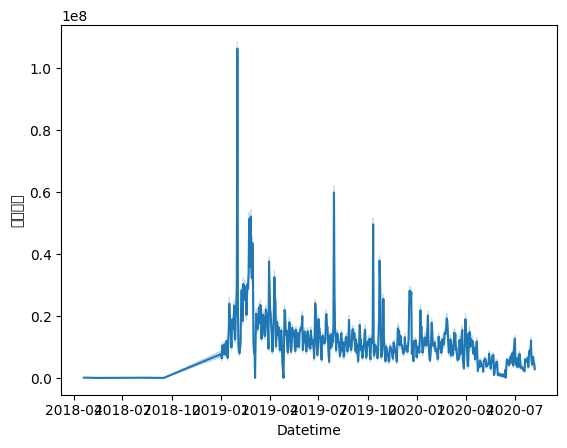

In [10]:
sns.lineplot(data=df1, x='Datetime', y='구매금액', estimator=sum)

In [11]:
p1 = pd.pivot_table(data=df1, index='Datetime', values='구매금액', aggfunc='sum').reset_index()

<Axes: xlabel='Datetime', ylabel='구매금액'>

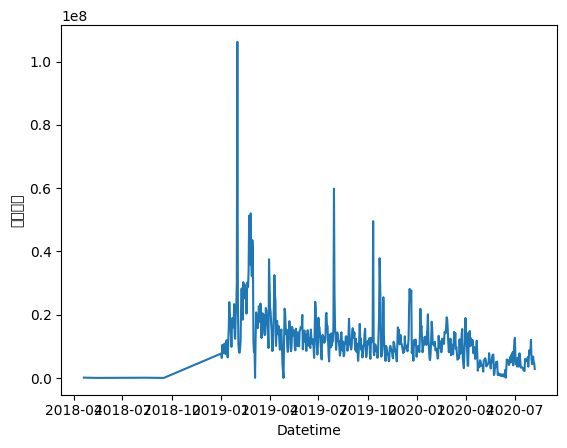

In [12]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [13]:
p2 = pd.pivot_table(data=df1, index=['Datetime', '물품대분류'],
                    values='구매금액',
                    aggfunc='sum').reset_index()

<Axes: xlabel='Datetime', ylabel='구매금액'>

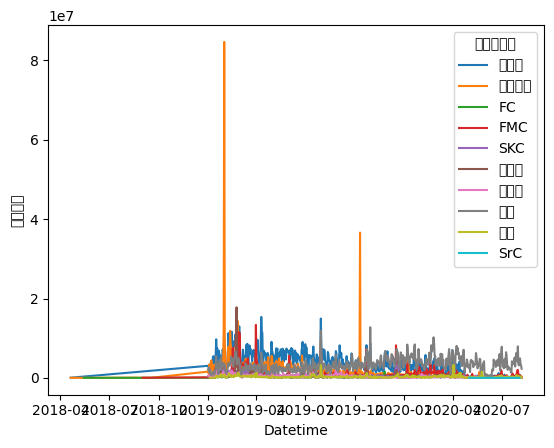

In [14]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

In [15]:
cond1 = (df1['물품대분류']=='기저귀')
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


## ARIMA
- Auto Regressive Integrated Moving Average Model
- AR
- MA
- Difference
<br>

### AR
- Auto Regressive Model: 자기회귀모델
- p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
- ACF: 자기상관함수/ 특정 구간내 데이터간 상관관계
  교회가 늘어나고 범죄율도 늘어나
  그럼 교회가 늘어날수록 범죄율이 늘어난다고 생각할 수도 있는데
  사실 인구가 늘어날 수록 교회가 늘어나는 거였고
  인구가 증가했기 때문에 범죄율이 늘어나는 거였다!
- PACF: 부분자기상관함수/ 다른 거 다 떠나서 둘 간의 관계만 확인한다면
<br>

### MA
- Moving Average Model: 이동평균모델
- 일정한 구간 데이터의 평균을 계산해 미래를 예측하는 모델
- 평균을 중심으로 각 시계열 값이 가지는 오차를 모형에 반영
<br>

## Difference
- 차분
- stationary한 그래프는 평균과 분산이 일정한 상태를 의미
- non stationary한 데이터는
  - 그래프의 분산은 일정하지만 평균이 상승하는 상태
  - 그래프의 분산도 평균도 불규칙한 상태
  - 그래프가 시계열적으로 골고루 퍼지지 않은 상태
- 정상상태로 바꾸기 위해 differencing(차분)이 필요하다!
- 보통 1~2번 정도 해주고 차분 횟수에 따라 1차차분/ 2차차분으로 불린다
<br>

## 조건
- 단기예측에 적합
- 계절적 변동요인(주기적 변동)
- sample > 50일때만 사용
- 정성적자료(일정한 트렌드가 있을 때)


In [16]:
import statsmodels.tsa.api as tsa

In [17]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [18]:
df_time = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [19]:
y = df_time['구매금액'].resample('1D').mean()

In [20]:
y.isnull().sum()

13


## 시계열 분해
- Trend(추세요인)
- Seasonality(계절요인)
- Cycle/ Residual(불규칙, 순환요인)


In [42]:
# 전날 있었던 가격을 결측치 값으로 넣는 게 낫다
# ffill: forward, bfill: backward(뒤의 일자)
y2 = y.fillna(method='ffill')
y2

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03     337300.0
2020-08-04     766800.0
2020-08-05     136700.0
2020-08-06     266900.0
2020-08-07      99800.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

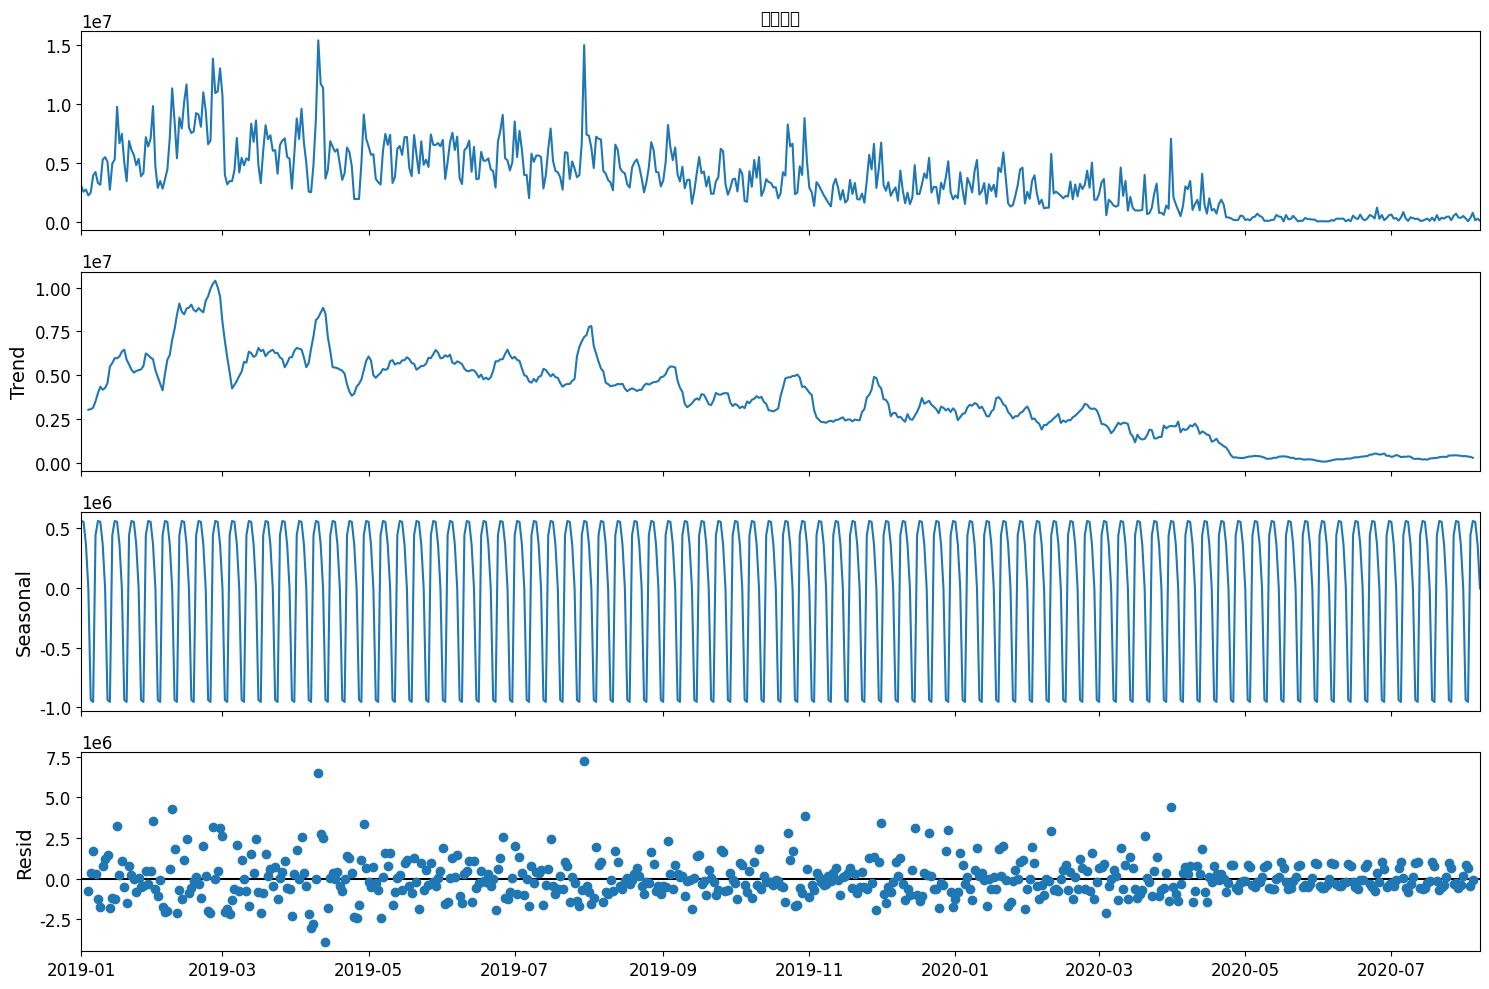

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# 차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y2, model='addictive')

# 모델 시각화
fig = model_series.plot()
plt.show()

In [23]:
import itertools

In [31]:
# p: 며칠 전의 자료가 오늘 영향을 주는가?
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [70]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [71]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      # enforce_stationary: AR항이 stationary를 띄게 함(default=True)
      # enforce_invertibility: MA항이 stationary를 띄게 함(default=False)
      mod = tsa.statespace.SARIMAX(y2, order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
      results = mod.fit()
      param_list.append(param)
      param_seasonal_list.append(param_seasonal)
      results_AIC_list.append(results.aic)
    except:
      continue

In [72]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [75]:
# AIC값이 낮을수록 데이터가 변동이 없이 정확하다는 뜻
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",17677.039460
47,"(1, 0, 1)","(1, 1, 1, 12)",17678.588752
59,"(1, 1, 1)","(0, 1, 1, 12)",17683.441481
63,"(1, 1, 1)","(1, 1, 1, 12)",17684.116594
35,"(1, 0, 0)","(0, 1, 1, 12)",17712.181833
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",18700.095252
12,"(0, 0, 1)","(1, 0, 0, 12)",18706.517364
1,"(0, 0, 0)","(0, 0, 1, 12)",18873.170990
8,"(0, 0, 1)","(0, 0, 0, 12)",19169.834010


In [80]:
mod = tsa.statespace.SARIMAX(y2, order=(1, 0, 1), seasonal_order=(0, 1, 1, 12),
                             enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -8834.520
Date:                            Sun, 17 Dec 2023   AIC                          17677.039
Time:                                    05:22:52   BIC                          17694.344
Sample:                                01-01-2019   HQIC                         17683.797
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7789      0.042     18.540      0.000       0.697       0.861
ma.L1         -0.1519      0.070   

### Likelihood (최대우도)
- 특정 데이터가 모수로부터 추출되었을 가능도
- ex) 성적 확률분포표에서 80점인 학생이 이 분포의 몇퍼센트에 위치하는가?
- 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)
<br>
<br>

### AIC (Akaike Information Criterion)
- 데이터에 대한 모델의 상대적 품질
- AIC = -2 ln(L) + 2k
- 값이 낮을 수록 모형 적합도가 높은 것을 의미
<br>
<br>

### BIC (Bayes Information Criterion)
- BIC = -2 ln(L) + log(n)p
- 설명변수가 많을 때 AIC보다 많은 패널티를 부여해서 모델이 얼마나 잘 만들어졌는지를 평가
<br>
<br>

### HQIC (Hannan Quinn Information Criterion)
- HQIC = -2 ln(L) + 2k ln(ln(n))

### Order(p, d, q), Seasonal Order(P, D, Q, M)
- p: AR에서의 p값 (p구간 내 데이터 사이의 상관관계)
- d: 차분
- q: MA PACF 편상관관계수 q값
- P: 계절성 구간 내에서의 데이터 사이 상관관계
- D: 계절성 여부(1 or 0)
- Q: 주기의 패턴이 얼마나 반복되는지? 횟수
- M: 주기가 어떻게 되는지? 주기의 값